In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

time: 300 µs (started: 2022-12-07 10:24:00 +00:00)


number of end_epoch: 9999


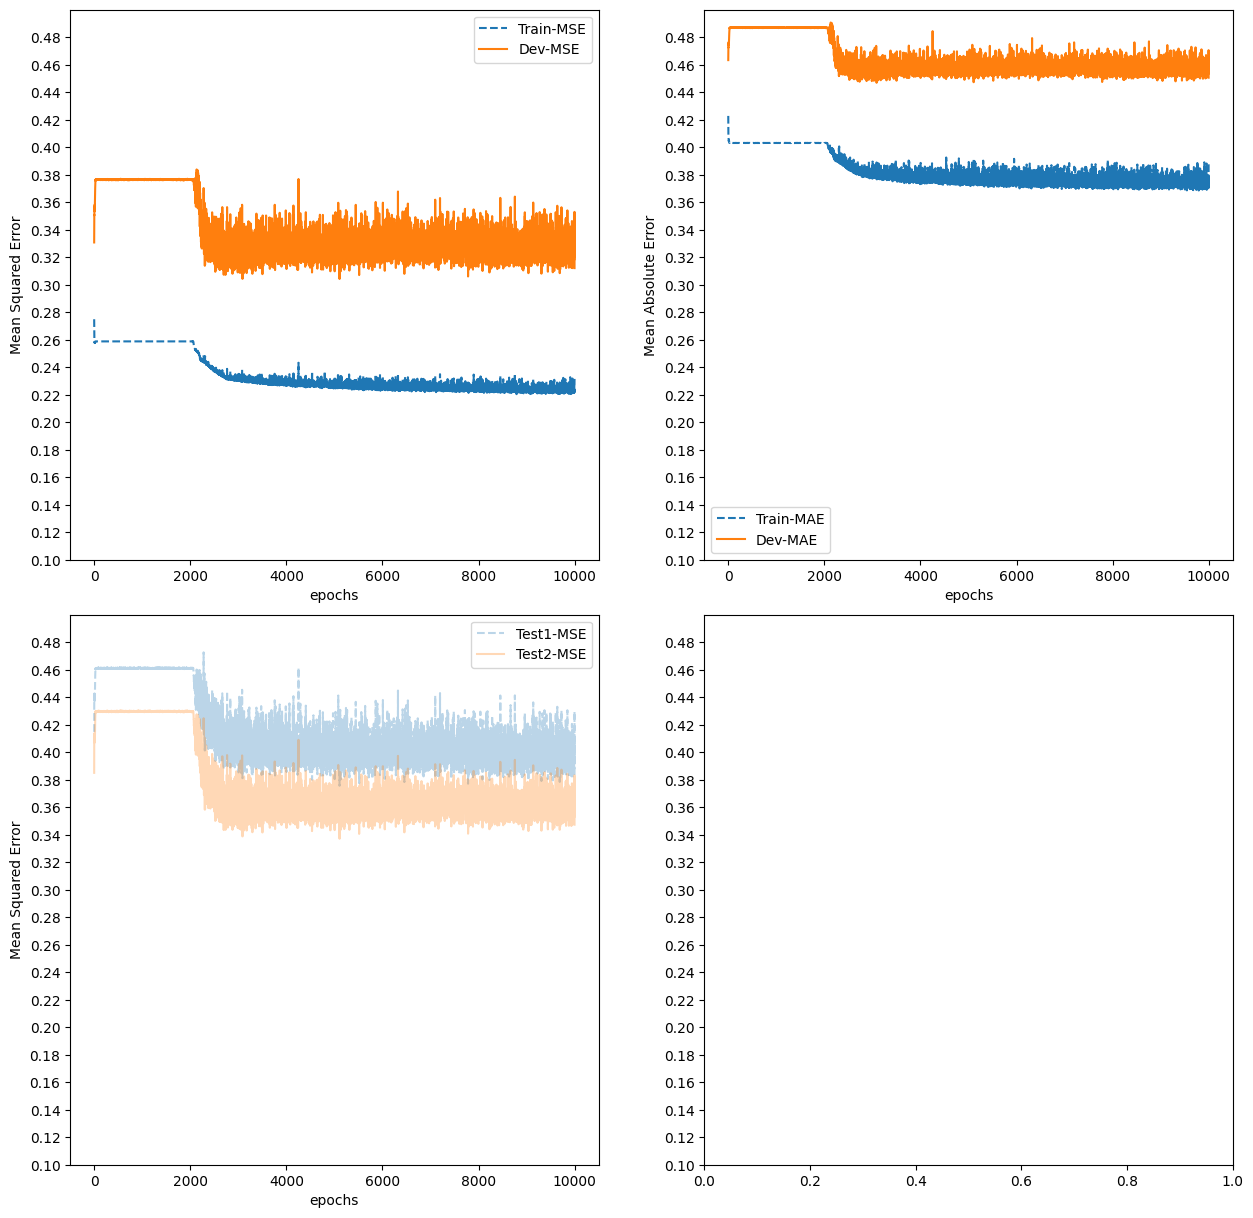

Min of score_total:-4.250641419491675
< OPT. SCORE_TOTAL EPOCH  3088 > : -4.250641419491675
opt. DEV MSE :  0.3042575716972351
opt. TEST1 MSE :  0.3811463117599487
opt. TEST2 MSE :  0.3387675285339355
time: 497 ms (started: 2022-12-07 10:24:00 +00:00)


In [9]:
ELBOW = 5

# scores = pd.read_csv("../arima_lstm_hybrid_model_train/results/20220924/Kristian_Senneset_LSTM_hyper_params/sp500_20082017_train_LSTM_evaluation.csv")
# scores = pd.read_csv("../arima_lstm_hybrid_model/train/results/20221119/sp500_20082017-train_train-kS_hyper_lstm_evaluation.csv")
scores = pd.read_csv("../arima_lstm_hybrid_model/train/results/20221207/sp500_20082017_corr_ser_abs_corr_mat_hrchy_11_cluster-train_train-kS_hyper_lstm_evaluation.csv")
end_epoch = scores.shape[0]
print(f"number of end_epoch: {end_epoch}")

fig,axes=plt.subplots(2,2, figsize=(15, 15))
plt.setp(axes, ylim=(0.1, 0.5), yticks=np.arange(0.1, 0.5, step=0.02))
ax1, ax2, ax3, ax4 = axes[0,0], axes[0,1], axes[1,0], axes[1,1]
ax1.plot(scores['TRAIN_MSE'][:end_epoch],'--', label="Train-MSE")
ax1.plot(scores['DEV_MSE'][:end_epoch], label="Dev-MSE")
ax1.legend()
ax1.set_xlabel('epochs')
ax1.set_ylabel('Mean Squared Error')
ax2.plot(scores['TRAIN_MAE'][:end_epoch],'--', label="Train-MAE")
ax2.plot(scores['DEV_MAE'][:end_epoch], label="Dev-MAE")
ax2.legend()
ax2.set_xlabel('epochs')
ax2.set_ylabel('Mean Absolute Error')
ax3.plot(scores['TEST1_MSE'][:end_epoch],'--', label="Test1-MSE", alpha=0.3)
ax3.plot(scores['TEST2_MSE'][:end_epoch], label="Test2-MSE", alpha=0.3)
ax3.legend()
ax3.set_xlabel('epochs')
ax3.set_ylabel('Mean Squared Error')
plt.subplots_adjust(wspace=0.2,hspace=0.1)
plt.show()
plt.close()

# score_diff = (scores['DEV_MSE']-scores['TRAIN_MSE'])[ELBOW:]
# score_sum = (scores['DEV_MSE']+scores['TRAIN_MSE'])[ELBOW:]
score_diff = (scores['DEV_MSE'] - scores['TRAIN_MSE'])
score_sum = (scores['DEV_MSE'] + scores['TRAIN_MSE'])
score_diff_norm = (score_diff - np.mean(score_diff))/np.std(score_diff)
score_sum_norm = (score_sum - np.mean(score_sum))/np.std(score_sum)
score_total = score_diff_norm + score_sum_norm
idx = np.argmin(score_total)
print(f"Min of score_total:{score_total.min()}")
print('< OPT. SCORE_TOTAL EPOCH ',str(idx+1),'> : '+str(score_total[idx]))
print('opt. DEV MSE : ',str(scores['DEV_MSE'][idx]))
print('opt. TEST1 MSE : ',str(scores['TEST1_MSE'][idx]))
print('opt. TEST2 MSE : ',str(scores['TEST2_MSE'][idx]))